In [1]:
import numpy as np
import csv
import math
import scipy.optimize
from matplotlib.pyplot import cm
import matplotlib.pyplot as py
%matplotlib inline

In [2]:
#readng data from the relevant file from Gaia archive:
f2=open('TgasSource_000-000-009.csv')
csv_f2=csv.reader(f2)
data=list(csv_f2)

In [3]:
#Initial parameter values chosen:(for LMC): (Van der Marel 2016)
ra0=78.76
ra0_err=0.52
dec0 = -69.19
dec0_err=0.25
ii=44.1
theta=123.6
vlos=262.2
v0=108.4
R0=0.088
D0=50.1
PMw0=-1.874
PMw_err0=0.039
PMn0=0.223
PMn_err=0.049
v_d=1.104 #vlos/D0 in mas/yr
v_derr=0.053 #error in vlos/D0

In [4]:
#Matching the Gaia Source IDs of Marel 2016 with that of data files, to select the same sample of 29 LMC stars, as 
# selected by Vander Marel.
LMC=[]
SMC=[]
LMC_id=['4655349652394811136', '4655510043652327552', '4655460771785226880', '4661769941306044416', '4661720532007512320', '4655136518933846784', '4655158131209278464', '4662293892954562048', '4654621500815442816', '4655036841335115392', '4661920986713556352', '4661472145451256576', '4662061311885050624', '4651629489160555392', '4658269336800428672', '4658204053297963392', '4658137739001073280', '4660601607121368704', '4660444926713007872', '4658486455992620416', '4660175580731856128', '4660124762671796096', '4660246224352015232', '4657280635327480832', '4657700408260606592', '4657627943562907520', '4657722879521554176', '4659188769038018816', '4659091084305723392']
SMC_id=['4685876046561549184', '4685876046561548800', '4689033534707612800', '4685940436697751168', '4688967357860689024', '4690499767820637312', '4687436700227349888', '4687159863816994816']

#storing the data from these selected stars to new lists : LMC and SMC :
for i in data:
    if i[3] in LMC_id:
        LMC.append(i)
#        print (LMC)

    elif i[3] in SMC_id:
        SMC.append(i)

        
LMC_arr=np.asarray(LMC)
SMC_arr=np.asarray(SMC)

# ra = Right ascension ; dec= declination ; PMw = Proper motion west ; PMw_err = error in Proper motion west ;
# PMn= Proper motion north ; PMn_err= proper motion north error . THese are all from the LMC stars.
ra=LMC_arr[:,6]
for i in range(len(ra)):
    ra[i] = float(ra[i])
print (ra[1]) 
dec=LMC_arr[:,8]
PMw = LMC_arr[:,12] 
PMw_err=LMC_arr[:,13]
for i in range(len(PMw)):
    PMw[i] = -1.0 * float(PMw[i])
    PMw_err[i]= -1.0* float(PMw_err[i])
    
print('error of Proper motion west==',PMw_err)
print ('proper motion north==', PMw)

PMn=LMC_arr[:,14]
PMn_err=LMC_arr[:,15]
print ('shape of LMC',LMC_arr.shape)

# Similarly for the SMC stars: 
Sra=SMC_arr[:,6]
Sdec=SMC_arr[:,8]
S_PMw=SMC_arr[:,12]
print (S_PMw)
S_PMw_err=SMC_arr[:,13]
S_PMn=SMC_arr[:,14]
S_PMn_err=SMC_arr[:,15]
print ('shape of SMC',SMC_arr.shape)

#Straight means of proper motions (west and north) for both LMC and SMC stars, and are kept in PM_LMC, and PM_SMC:
rows = [12,14]
PM_LMC = []
PM_SMC = []

for i in rows: 
    PM_LMC.append(np.average(np.asarray(LMC_arr[:,i],dtype=float)))
    PM_SMC.append(np.average(np.asarray(SMC_arr[:,i],dtype=float)))
#    PM_LMC.append(np.average(np.asarray(LMC_arr[:,i],weights=inverse,dtype=float)))
    
#error bars
PM_LMC.insert(1,np.std(np.asarray(LMC_arr[:,12],dtype=float))/np.sqrt(len(LMC_arr[:,12])))
PM_LMC.insert(3,np.std(np.asarray(LMC_arr[:,14],dtype=float))/np.sqrt(len(LMC_arr[:,14])))
PM_SMC.insert(1,np.std(np.asarray(SMC_arr[:,12],dtype=float))/np.sqrt(len(SMC_arr[:,12])))
PM_SMC.insert(3,np.std(np.asarray(SMC_arr[:,14],dtype=float))/np.sqrt(len(SMC_arr[:,14])))

print ('LMC : mean proper motion west, error, mean proper motion norty, error====', PM_LMC)
print ('SMC : mean proper motion west, error, mean proper motion norty, error====', PM_SMC)

#weighted means of PM west and north of LMC stars:

num=0.0
den=0.0
num2=0.
den2=0.0
for i in range(len(PMw)):
    num += float(PMw[i])*1./math.pow(float(PMw_err[i]),2)
    den += 1./math.pow(float(PMw_err[i]),2)
    num2+=float(PMn[i])*1./math.pow(float(PMn_err[i]),2)
    den2+= 1./math.pow(float(PMn_err[i]),2)
weighted_mean_PMw=num/den
weightedmean_PMn=num2/den2
print ("weighted_mean_west=====",weighted_mean_PMw)
print("weighted mean north=====",weightedmean_PMn)

#wewighted means of SMC stars:

num=0.0
den=0.0
num2=0.
den2=0.0
for i in range(len(S_PMw)):
    num += float(S_PMw[i])*1./math.pow(float(S_PMw_err[i]),2)
    den += 1./math.pow(float(S_PMw_err[i]),2)
    num2+=float(S_PMn[i])*1./math.pow(float(S_PMn_err[i]),2)
    den2+= 1./math.pow(float(S_PMn_err[i]),2)
weighted_mean_PMw=num/den
weightedmean_PMn=num2/den2
print ("weighted_mean_west_SMC======",weighted_mean_PMw)
print("weighted mean north SMC ======",weightedmean_PMn)



#mean_PMw_LMC=(np.sum(np.asarray(PMw)),dtype=float)/len(PMw)



75.53083303793466
error of Proper motion west== ['-0.10502249591387683' '-0.14594500496426369' '-0.24023495207568865'
 '-0.23191283229281281' '-0.2344622417440697' '-0.15056086577929276'
 '-0.08760562515628526' '-0.1596192951561663' '-0.18715535862653113'
 '-0.2308274580475647' '-0.18512787192966287' '-0.1418295762784714'
 '-0.13073738987414385' '-0.1964090841673527' '-0.09199441660358287'
 '-0.13794297167424616' '-0.15442964378812604' '-0.1532543037642423'
 '-0.18219662331125877' '-0.2044998932950715' '-0.09548787770551527'
 '-0.1730632392855164' '-0.07888049377797643' '-0.07203058494737004'
 '-0.14509579094803796' '-0.12046700134826904' '-0.10438541041423083'
 '-0.21230539396452633' '-0.16169077114379915']
proper motion north== ['-2.236264889019932' '-1.9729335310729326' '-1.9419132278786948'
 '-1.9505212669353278' '-1.8694245094008717' '-2.0117231415689045'
 '-1.8951689729494912' '-1.7717218970370148' '-1.7232953226661236'
 '-1.7793182760688162' '-1.8738582471457808' '-1.73335152694

In [5]:
#for i in rows:
#    PM_LMC.append(np.sum(np.asarray((LMC_arr[:,i])/(LMC_arr[:,13])))/(np.sum(1/(np.asarray(LMC_arr[:,13]))))
#    PM_LMC.append(np.sum(np.multiply(np.asarray(LMC_arr[:,i]),1./np.asarray(LM_arr[:,13]))))/(np.sum(1./np.asarray(LMC_arr[:,13]))
     
#    print (PM_LMC)
#    PM_SMC.append(np.average(np.asarray(SMC_arr[:,i],dtype=float)))

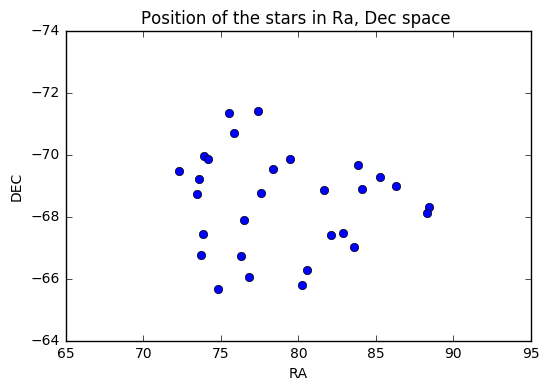

In [6]:
#plotting the initial co-ordinates of the stars
py.plot(ra,dec,'bo')
py.xlim(65,95)
py.ylim(-64,-74)
py.xlabel('RA')
py.ylabel('DEC')
py.title('Position of the stars in Ra, Dec space ')
py.show()

1.9440000000000002
[-0.704242944254748, -0.19232678440578072, -0.1320233149961825, -0.14875734292227702, 0.008894753724705667, -0.2677337872099502, -0.0411524834138106, 0.1988286321600435, 0.2929698927370559, 0.18406127132222153, 0.00027556754860242987, 0.27342063162525876, -0.016218507273402464, -0.4084488160944424, -0.04282383043946106, 0.319781320891027, 0.41351595552690723, 0.6094789255578199, 0.5572657360492485, 0.594716233189544, 0.46802051899376546, 0.7070401272366411, 0.7289481547731365, 0.17366049500030153, 0.20907874912490854, 0.22968522113164347, 0.3872817908130357, 0.6210571280390393, 0.5069337379466528]
[-0.09717564883258162, -0.4152574221483686, -0.07392651175404694, -0.4215930567327209, -0.19363526525575459, -0.6630639720583414, -0.45934783374898314, -0.7986871075025802, 0.7439001706821309, 0.7845624086947479, 0.9848538919558733, 1.1476045960960704, 0.13010382567000764, 0.26503978722749355, 0.10642060450726623, 0.9184187329458383, 1.4155054246433303, 1.3979175177699548, 

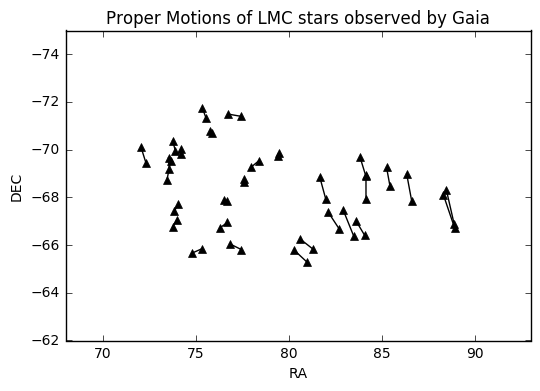

In [7]:
#Proper motions of LMC stars within a timeframe of t=7.2 Myr. The direction of the motion of stars is towards the
# arrow pointer ^
# we have assumed the Proper motion of center of mass as the samae as mentioned in MArel 2016 paper.

c=(7.2*math.pow(10,6))*(2.7*math.pow(10,-7)) #necessary factors to convert the(proper motion*time)in units of degrees
print (c)
PMw2=[]
for i in range(len(PMw)):
    PMw2.append(c*(float(PMw[i])-PMw0))
print (PMw2)
PMn2=[]
for i in range(len(PMn)):
    PMn2.append(c*float(PMn[i])-PMn0)
print (PMn2)
#PM=np.zeroes(len(ra))
#PM=np.sqrt(np.square(np.sum(LMC_arr[:,12]),np.square(LMC_arr[:,14])))
ra2=[]
dec2=[]
for i in range(len(ra)):
    ra2.append(PMw2[i]+float(ra[i]))
    dec2.append(PMn2[i]+float(dec[i]))
#py.plot ([ra,ra2],[dec,dec2], 'ro')
py.plot ([ra,ra2],[dec,dec2],'k', marker ='^',)
py.xlim(68,93)
py.ylim(-62,-75)
#py.axis('equal')
#py.quiver(X, Y, u, v, scale=0.2, units='xy')
py.xlabel('RA')
py.ylabel('DEC')
py.title('Proper Motions of LMC stars observed by Gaia')
py.show()
#u=v=np.zeroes[]

1.9440000000000002
[-0.8949735315782481, -0.38305737172928084, -0.32275390231968265, -0.33948793024577717, -0.18183583359879446, -0.45846437453345035, -0.23188307073731074, 0.0080980448365433801, 0.10223930541355579, -0.0066693160012786133, -0.1904550197748977, 0.082690044301758636, -0.20694909459690261, -0.59917940341794251, -0.23355441776296118, 0.12905073356752686, 0.22278536820340711, 0.41874833823431984, 0.36653514872574827, 0.40398564586604396, 0.27728993167026533, 0.51630953991314099, 0.53821756744963622, -0.017070092323198605, 0.01834816180140841, 0.038954633808143325, 0.19655120348953559, 0.43032654071553916, 0.31620315062315263]
[-0.1202947413104255, -0.43837651462621247, -0.09704560423189082, -0.44471214921056479, -0.21675435773359847, -0.68618306453618527, -0.48246692622682708, -0.82180619998042415, 0.72078107820428694, 0.76144331621690398, 0.96173479947802931, 1.1244855036182266, 0.10698473319216376, 0.2419206947496497, 0.083301512029422348, 0.89529964046799437, 1.39238633

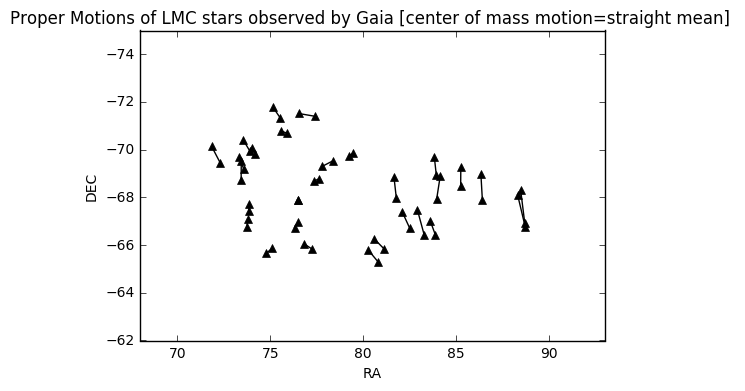

In [8]:
#Proper motions of LMC stars within a timeframe of t=7.2 Myr. 
# here we have assumed the Proper motion of center of mass as the straight means of the proper motions of the stars. .

c=(7.2*math.pow(10,6))*(2.7*math.pow(10,-7)) #necessary factors to convert the(proper motion*time)in units of degrees
print (c)
PMw2=[]
for i in range(len(PMw)):
    PMw2.append(c*(float(PMw[i])-PM_LMC[0]))
print (PMw2)
PMn2=[]
for i in range(len(PMn)):
    PMn2.append(c*float(PMn[i])-PM_LMC[2])
print (PMn2)

ra2=[]
dec2=[]
for i in range(len(ra)):
    ra2.append(PMw2[i]+float(ra[i]))
    dec2.append(PMn2[i]+float(dec[i]))
#py.plot ([ra,ra2],[dec,dec2], 'ro')
py.plot ([ra,ra2],[dec,dec2],'k', marker ='^',)
py.xlim(68,93)
py.ylim(-62,-75)
#py.axis('equal')
#py.quiver(X, Y, u, v, scale=0.2, units='xy')
py.xlabel('RA')
py.ylabel('DEC')
py.title('Proper Motions of LMC stars observed by Gaia [center of mass motion=straight mean] ')
py.show()
#u=v=np.zeroes[]

In [9]:
#In a quest to find out the LMC centre of mass porper motion by Chi_square minimization of modelled and observed 
#proper motion (miu) :

In [10]:
phi=[]
rho=[]
PHI=[]
for i in range(len(ra)):
    rho.append(math.acos(math.cos(0.0174533*float(dec[i]))*math.cos(0.0174533*dec0)*math.cos((0.0174533*(float(ra[i])-ra0))+math.sin(0.0174533*float(dec[i]))*math.sin(0.0174533*dec0))))
                                             
    phi.append(math.atan(((math.sin(0.0174533*float(dec[i])*math.cos(0.0174533*dec0))-(math.cos(0.0174533*float(dec[i]))*math.sin(0.0174533*dec0)*(math.cos(0.0174533*(float(ra[i])-ra0)))))/(-math.cos(0.0174533*float(dec[i])*math.sin(0.0174533*(float(ra[i])-ra0)))))))
#    rho.append(math.atan(-1.0*math.cos(0.0174533*float(dec[i]))*math.sin(0.0174533*(float(ra[i])-ra0))/(math.cos(float(phi[i])))*(math.cos(0.0174533*dec0)*math.cos(0.0174533*float(dec[i]))*math.cos(0.0174533*float(dec[i]))*math.sin(0.0174533*dec0)*(math.cos(0.0174533*(float(ra[i])-ra0)))+math.sin(0.0174533*dec0*float(dec[i]))*math.sin(0.0174533*dec0))))
    PHI.append(phi[i]-0.0174533*90)
print('rho===',rho) 
print("phi====",phi)
print("PHI===",PHI)
                                                                                
                                                                                    
c_gamma=[]
s_gamma=[]
for i in range(len(ra)):
    c_gamma.append(((math.sin(0.0174533*float(dec[i]))*math.cos(0.0174533*dec0)*math.cos(0.0174533*float(ra[i])-ra0))- (math.cos(0.0174533*float(dec[i]))*math.sin(0.0174533*dec0)))/math.sin(float(rho[i])))
#    s_gamma.append(math.cos(0.0174533*dec0)*math.sin(float(PHI[i]))/math.cos(0.0174533*float(dec[i])))
    s_gamma.append(math.cos(0.0174533*dec0)*math.sin(0.0174533*(float(ra[i])-ra0))/(math.sin(float(rho[i]))))
print ('c_gamma = ',c_gamma)
print('s_gamma=',s_gamma)
        

#
                                          




rho=== [1.497007865521572, 1.4939335297429843, 1.4916282967042713, 1.4852833849744058, 1.485197922380408, 1.4805318900163886, 1.481309106231849, 1.4787995576164148, 1.5004672340709946, 1.5014209358667887, 1.4980026896070027, 1.5024398232921123, 1.4936375429297595, 1.4905494635513978, 1.48589953529125, 1.4933586222384116, 1.5040444972659806, 1.5030101406444607, 1.4899665156675854, 1.4881215765180282, 1.4894707079973428, 1.4803815316772595, 1.477734173055043, 1.4800431860276881, 1.473476939527938, 1.470076798542818, 1.474496422322308, 1.4722964832249243, 1.466792291864181]
phi==== [0.12967184149656288, 0.1289980555874781, 0.11561951063373685, 0.10140702650651981, 0.09865336910963125, 0.09213618365674814, 0.0859777025746752, 0.07576334789288806, 0.0956015015110598, 0.08802975206667046, 0.07965988359327394, 0.08363968586326564, 0.09740091529658826, 0.09096071981275793, 0.07514110945887909, 0.0775940779303827, 0.07186293836538693, 0.06757106599034761, 0.04916426223018401, 0.0474222461950625

In [11]:
#calculation of internal rotaion component of proper motion: (Vander Marel 2002 paper page 4-5)
temp1=[]
temp2=[]
for i in range((len(ra))):
    
        temp1.append((-s_gamma[i])*(math.sin(0.0174533*ii)*math.cos((float(phi[i]))-0.0174533*theta)*math.cos(0.0174533*ii)*math.sin(float(rho[i]))+math.sin(0.0174533*ii)*math.cos(float(rho[i]))*math.sin((float(phi[i])-0.0174533*theta)))+(-c_gamma[i])*(-1.0*(math.pow(math.cos(0.0174533*ii),2))*(math.pow(math.cos(0.0174533*(float(phi[i])-theta)),2))+(math.pow(math.sin(0.0174533*(float(phi[i])-theta)),2))))
        temp2.append((s_gamma[i]*(math.pow(math.cos(0.0174533*ii),2))*(math.pow(math.cos(float(phi[i])-0.0174533*theta),2))+(math.pow(math.sin(0.0174533*(float(phi[i])-theta)),2)))+(c_gamma[i]*(math.sin(0.0174533*ii)*math.cos(0.0174533*(float(phi[i]))-theta)*(math.cos(0.0174533*ii)*math.sin(0.0174533*float(rho[i]))+math.sin(0.0174533*ii)*math.cos(0.0174533*float(rho[i]))*math.sin(0.0174533*(float(phi[i])-theta))))))
print("temp1=",temp1)
#for i in range (len(ra)):
#    temp2.append(temp1[:,1]*(-sin_gamma)+(-cos_gamma)*temp[:,2])
#    temp2.append(cos_gamma*temp1[:,1]+(-sin_gamma)*temp1[:,2])
print ('temp2=',temp2)

temp1= [-0.24085283046100447, -0.24991824849848795, -0.25340097726757554, -0.2683458869236814, -0.2678861471611075, -0.27963140581960094, -0.27579769696068224, -0.2802930440271122, -0.2243206292211222, -0.22074303709229465, -0.22854334976099946, -0.21758754602962044, -0.24347564241068997, -0.25080987436742713, -0.26034068443045816, -0.24051379713714152, -0.21247163166353522, -0.21461723490493845, -0.24477182034985495, -0.24919484250650817, -0.2447225327819763, -0.26474803044862877, -0.2696926845291876, -0.2723626929320664, -0.2883195761193107, -0.294054930776271, -0.281922941082749, -0.28457293026213076, -0.29724504310446836]
temp2= [0.7772147128235309, 0.7780689441474666, 0.7793267451171968, 0.7814981752872882, 0.7816563609306293, 0.7829335032772933, 0.7830900095155268, 0.7840920402798269, 0.7791839840382648, 0.7798446097968725, 0.7811238599423124, 0.7802208707608342, 0.7801126935875276, 0.7811365721951655, 0.7830558538179749, 0.7818665459179343, 0.781505210562183, 0.7821124508519943,

In [12]:
constant=[]
for i in range(len(rho)):
    
    constant.append((math.cos(0.0174533*ii)*math.cos(float(rho[i]))-math.sin(0.0174533*ii)*math.sin(float(rho[i]))*math.sin(float(phi[i])-0.0174533*theta))/(D0*math.cos(0.0174533*ii)))
print (constant)

constant2=[]
den=[]
R_prime=[]
V_Rprime=[]
for i in range(len(rho)):
    den.append(math.sqrt((math.pow(math.cos(0.0174533*ii),2))*(math.pow(math.cos(float(phi[i])-0.0174533*theta),2)))+math.pow(math.sin(0.0174533*(float(phi[i])-theta)),2))
    R_prime.append((float(constant[i])*math.cos(0.0174533*ii))/math.sin(float(rho[i])))
    print(R_prime[i])
    V_Rprime.append(v0*float(min(float(R_prime[i])/(R0/D0),1)))
    constant2.append((float(constant[i])*float(V_Rprime[i])/float(den[i])))
print(constant2)

    

[0.018784035853819034, 0.0188354745152552, 0.018762754527318445, 0.018753998795182292, 0.0187307668849363, 0.01875733961598491, 0.018686469013153916, 0.018637215221639778, 0.018419562460637185, 0.018332353214949828, 0.018318507201264277, 0.01827259553037569, 0.018563258370405934, 0.018561876271930594, 0.018500771779322075, 0.018385675903900653, 0.018131781499761288, 0.018110291932792632, 0.018174853049970217, 0.01819184047797096, 0.018095993620250155, 0.01809111495472962, 0.018041015847221967, 0.018434903975729083, 0.01847594520617127, 0.01839724555610327, 0.01830109774441475, 0.018196010014123895, 0.0182209290857177]
0.013526112169858268
0.013566299630849158
0.013516358427294695
0.013517127056175325
0.01350048138503162
0.013525196556828302
0.013473150774695892
0.013440707063492208
0.013260348496753468
0.013196685459713036
0.01318992826835778
0.01315274405264002
0.013370540613683948
0.013372801597490436
0.013333909486875246
0.013242919543210326
0.013049968232061279
0.01303540991309805


In [13]:
#final values of internal motion from model (assuming theta, R0, D0, and v0 values from the paper):
miu_north_int=[]
miu_west_int=[]
for i in range(len(constant2)):
    miu_west_int.append(float(constant2[i])*float(temp1[i]))
    miu_north_int.append(float(constant2[i])*float(temp2[i]))
print ('miu_proper_west===',miu_west_int)
print('miu_proper_north===',miu_north_int)
        

miu_proper_west=== [-0.4843361743635587, -0.5037316412982027, -0.5046069673335427, -0.5295376799334894, -0.5271038073449036, -0.5488553432193368, -0.5373206502049144, -0.5413831450228138, -0.4332574822737579, -0.4224232237007453, -0.4348704491891602, -0.41395307170274515, -0.47443244341198954, -0.4868148381304825, -0.4989828554412176, -0.458770506707445, -0.3983515064892059, -0.400898915412357, -0.45405176539287173, -0.46223321808676787, -0.44974271119047293, -0.4818448056787711, -0.48694604843739314, -0.5147521981806901, -0.5436195592819538, -0.5477203367725593, -0.5219325418810369, -0.5197337798645895, -0.5414853668301112]
miu_proper_north=== [1.5629179028019256, 1.5682646170631043, 1.551902876050309, 1.5421616308640558, 1.5380192228981158, 1.5367273765250844, 1.525648827813963, 1.5144657486148214, 1.5049319909836767, 1.4923436697951629, 1.4863162030341919, 1.484344264878427, 1.5201141588165266, 1.516163886729235, 1.5008466569981131, 1.4913793541908138, 1.465201615477771, 1.460963903

In [14]:
#centre of mass motion contribution to Proper motion, with two parameters : vtr1 and thetat1 , which is minimised by 
#downhill simplex routine "scipy.optimize.fmin" : 
miu_west_CM=[]
miu_north_CM=[]
#vtr=150
#thetat=0.0174533*100
miu_west_model=[]
miu_north_model=[]
chisq=[]

'''for i in range(len(rho)):
    miu_west_CM.append((vtr1*math.sin(float(phi[i])-thetat1))/D0)
    miu_north_CM.append(((vtr1*math.cos(float(phi[i])-thetat1))-(v_d*math.sin(float(rho[i])))))
    miu_west_model.append(float(miu_west_int[i])+float(miu_west_CM[i]))
    miu_north_model.append(float(miu_north_int[i])+float(miu_north_CM[i]))
    chisq.append((math.pow((float(PMw[i])-float(miu_west_model[i]))/float(PMw_err[i]),2))+(math.pow((float(PMn[i])-float(miu_north_model[i]))/float(PMn_err[i]),2)))
    z+= float(chisq[i])
#result=optimize.fmin(z,[150,0.0174533*100])
#print(result)
print ("value of z", z)
'''
def opt_func(t):
    vtr1,thetat1 = t
    z = 0.0
    for i in range(len(rho)):
        miu_west_CM.append(((vtr1*math.sin(float(phi[i])-thetat1))/D0)+2)
        print(miu_west_CM[i])
        miu_north_CM.append((vtr1*math.cos(float(phi[i])-thetat1))+(v_d*math.sin(float(rho[i]))))
        miu_west_model.append(float(miu_west_int[i])+float(miu_west_CM[i]))
        miu_north_model.append(float(miu_north_int[i])+float(miu_north_CM[i]))
        chisq.append((math.pow((float(PMw[i])-float(miu_west_model[i]))/float(PMw_err[i]),2))+(math.pow((float(PMn[i])-float(miu_north_model[i]))/float(PMn_err[i]),2)))
        z+= float(chisq[i])
    return z
        
min_args =scipy.optimize.fmin(opt_func,x0=[30,0.0174533*96.78])
print("vt and theta_t values are:", min_args)
#print("min_value", min_value)
#print("func_value", funcvalue)
print(opt_func(min_args))
    
#print(miu_west_model)
#print(miu_north_model)

1.40123609108
1.40123165269
1.40119981099
1.40128338838
1.40131356784
1.40140308048
1.40151103045
1.401740117
1.40135231928
1.40147253893
1.40164536063
1.40155795748
1.40132879641
1.40142193182
1.40175608977
1.40169446573
1.40184406447
1.40196896016
1.40262950655
1.40270250801
1.40301957403
1.40390088005
1.40446975736
1.40232318735
1.40263942339
1.40328474234
1.40336218725
1.40414477235
1.40459017033
1.40123609108
1.40123165269
1.40119981099
1.40128338838
1.40131356784
1.40140308048
1.40151103045
1.401740117
1.40135231928
1.40147253893
1.40164536063
1.40155795748
1.40132879641
1.40142193182
1.40175608977
1.40169446573
1.40184406447
1.40196896016
1.40262950655
1.40270250801
1.40301957403
1.40390088005
1.40446975736
1.40232318735
1.40263942339
1.40328474234
1.40336218725
1.40414477235
1.40459017033
1.40123609108
1.40123165269
1.40119981099
1.40128338838
1.40131356784
1.40140308048
1.40151103045
1.401740117
1.40135231928
1.40147253893
1.40164536063
1.40155795748
1.40132879641
1.4014219318

In [15]:
vtr1=min_args[0]
thetat1=min_args[1]
CM_final_west=0.
CM_final_north=0.
for i in range(len(rho)):
        miu_west_CM.append(((vtr1*math.sin(float(phi[i])-thetat1))/D0)+2)
#        print(miu_west_CM[i])
        miu_north_CM.append((vtr1*math.cos(float(phi[i])-thetat1))+(v_d*math.sin(float(rho[i]))))
        CM_final_west+=float(miu_west_CM[i])
        CM_final_north+=float(miu_north_CM[i])
avg_west=CM_final_west*1./len(rho)
avg_north=CM_final_north/len(rho)
print (avg_west)
print (avg_north)

1.402207859744272
-0.3438831955738692
